# GPTZero threshold

In [35]:
# finding gptzero threshold

import sys
import json
import numpy as np
import pandas as pd
from tqdm import tqdm 
import seaborn as sns
sys.path.append("/Users/bobaebak/git/ai_text_detection")
# sys.path.append("/mnt/data/bobae/ai_text_detection")

from models.gptzero_detector import *
from utils.text_helper import tokenize_text
from utils.plot_helper import *

# human threshold

In [4]:
# human data

# loads a tofel dataset
with open('../dataset/human/tofel.json', "r") as f:
    h_tofel_dataset = json.load(f)

# loads an arxiv dataset
with open('../dataset/human/arxiv.json', "r") as f:
    h_arxiv_dataset = json.load(f)

# loads student essay
with open('../dataset/human/student_essay.json', "r") as f:
    h_essay_dataset = json.load(f)

# loads student computer essay
with open('../dataset/human/student_cs_essay.json', "r") as f:
    h_essay_cs_dataset = json.load(f)

In [5]:
h_dataset = []
for i in [h_tofel_dataset, h_arxiv_dataset, h_essay_dataset, h_essay_cs_dataset]:
    h_dataset.extend(i)

len(h_dataset)

2478

In [ ]:
json_lst = []

for i, data in enumerate(tqdm(h_dataset)):
    try:
        input = data['input']
        result = detect(input)
        result['num_words'] = len(tokenize_text(input))
        json_lst.append(result)

    except Exception as e:
        print(e)
    
    if i%100 == 0:
        print(f"{i} index finished")

# save as json file
file_path = "".join('/mnt/data/bobae/ai_text_detection/dataset/human/gptzero_human.json')
print(f"saved to {file_path}...")
with open(file_path, "w") as f:
    json.dump(json_lst, f, indent=4)


# AI threshold

In [9]:
# gpt data

# loads a tofel dataset
with open('../dataset/ai/gpt2medium_tofel.json', "r") as f:
    gpt_tofel_dataset = json.load(f)

# loads an arxiv dataset
with open('../dataset/ai/gpt2medium_arxiv.json', "r") as f:
    gpt_arxiv_dataset = json.load(f)

# loads student essay
with open('../dataset/ai/gpt2medium_essay.json', "r") as f:
    gpt_essay_dataset = json.load(f)

# loads student computer essay
with open('../dataset/ai/gpt2medium_essay_cs.json', "r") as f:
    gpt_essay_cs_dataset = json.load(f)

# loads a tofel dataset
with open('../dataset/ai/gpt35_tofel.json', "r") as f:
    gpt_35_tofel_dataset = json.load(f)

# loads student computer essay
with open('../dataset/ai/gpt35_essay_cs.json', "r") as f:
    gpt_35_essay_cs_dataset = json.load(f)

In [10]:
gpt_dataset = []
for i in [gpt_tofel_dataset, gpt_arxiv_dataset, gpt_essay_dataset, gpt_essay_cs_dataset,
          gpt_35_tofel_dataset, gpt_35_essay_cs_dataset]:
    gpt_dataset.extend(i)

len(gpt_dataset)

2956

In [ ]:
json_lst = []

for i, data in enumerate(tqdm(h_dataset)):
    try:
        input = data['input']
        result = detect(input)
        result['num_words'] = len(tokenize_text(input))
        json_lst.append(result)

    except Exception as e:
        print(e)
    
    if i%100 == 0:
        print(f"{i} index finished")

# save as json file
file_path = "".join('/mnt/data/bobae/ai_text_detection/dataset/ai/gptzero_ai.json')
print(f"saved to {file_path}...")
with open(file_path, "w") as f:
    json.dump(json_lst, f, indent=4)


# Analaysis

In [29]:
with open('../dataset/human/gptzero_human.json', "r") as f:
    h_dataset = json.load(f)

with open('../dataset/ai/gptzero_ai.json', "r") as f:
    m_dataset = json.load(f)

In [30]:
print("Average of HUMAN perplexity: ", np.median([item['perplexity_per_line_avg'] for item in h_dataset]))
print("Average of AI perplexity: ", np.median([item['perplexity_per_line_avg'] for item in m_dataset]))

Average of HUMAN perplexity:  311.94571216739433
Average of AI perplexity:  48.4


Outliers using Z-Score method:


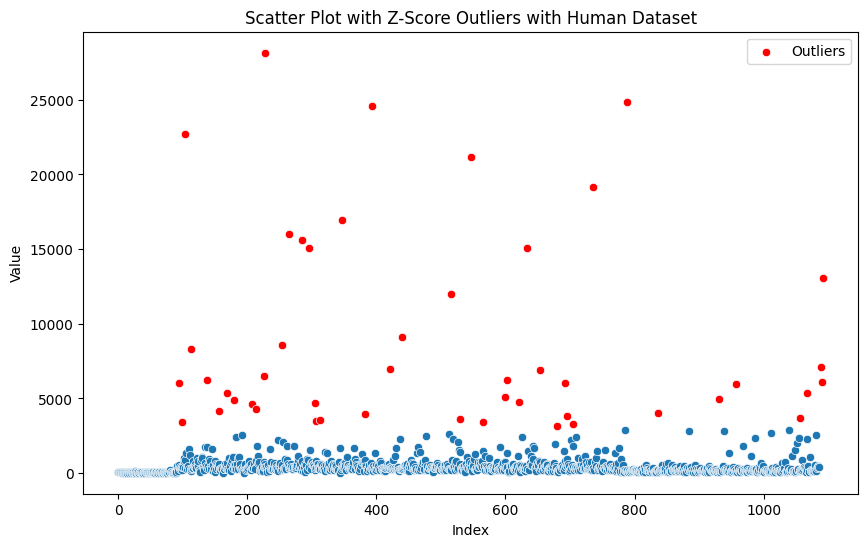

Average of HUMAN perplexity:  421.8550813110505
Average of HUMAN perplexity:  299.75


In [56]:
from scipy import stats

# Example dataset (replace with your actual data)
data = [item['perplexity_per_line_avg'] for item in h_dataset]

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Calculate Z-scores
df['Z-Score'] = np.abs(stats.zscore(df['Value']))

# Define threshold for Z-score
z_score_threshold = 1

# Identify outliers
outliers_z = df[df['Z-Score'] > z_score_threshold]

print("Outliers using Z-Score method:")
# print(outliers_z)
df.drop(outliers_z.index, inplace=True)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(df)), y=df['Value'])
sns.scatterplot(x=outliers_z.index, y=outliers_z['Value'], color='red', label='Outliers')
plt.title('Scatter Plot with Z-Score Outliers with Human Dataset')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

print("Average of HUMAN perplexity: ", df['Value'].mean())
print("Average of HUMAN perplexity: ", df['Value'].median())


Outliers using Z-Score method:


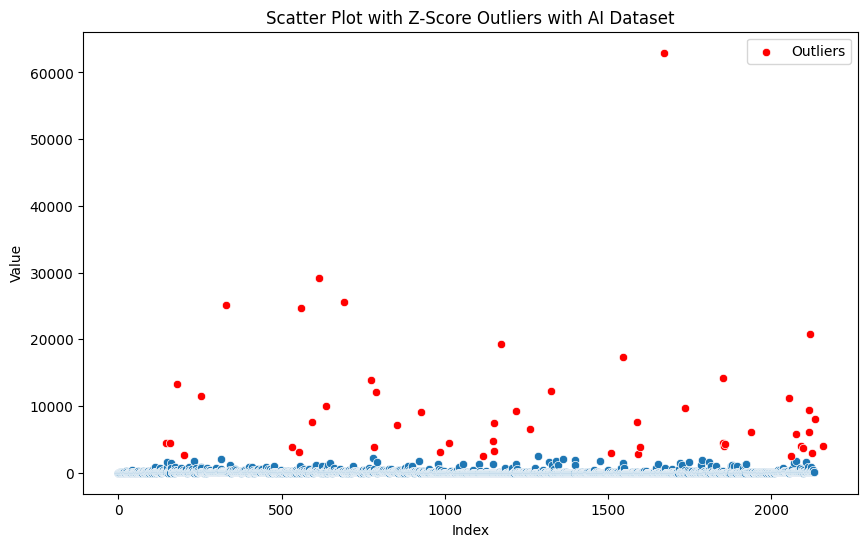

Average of AI perplexity:  124.25896263100697
Average of AI perplexity:  47.15


In [58]:
from scipy import stats

# Example dataset (replace with your actual data)
data = [item['perplexity_per_line_avg'] for item in m_dataset]

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Calculate Z-scores
df['Z-Score'] = np.abs(stats.zscore(df['Value']))

# Define threshold for Z-score
z_score_threshold = 1

# Identify outliers
outliers_z = df[df['Z-Score'] > z_score_threshold]

print("Outliers using Z-Score method:")
# print(outliers_z)
df.drop(outliers_z.index, inplace=True)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(df)), y=df['Value'])
sns.scatterplot(x=outliers_z.index, y=outliers_z['Value'], color='red', label='Outliers')
plt.title('Scatter Plot with Z-Score Outliers with AI Dataset')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

print("Average of AI perplexity: ", df['Value'].mean())
print("Average of AI perplexity: ", df['Value'].median())